In [1]:
!pip install tensorflow opencv-python-headless scikit-learn matplotlib seaborn numpy pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip "/content/drive/MyDrive/Colab Notebooks/asl_alphabet_train/archive.zip" -d /content/asl_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/asl_dataset/archive/asl_alphabet_train/asl_alphabet_train/W/W2815.jpg  
  inflating: /content/asl_dataset/__MACOSX/archive/asl_alphabet_train/asl_alphabet_train/W/._W2815.jpg  
  inflating: /content/asl_dataset/archive/asl_alphabet_train/asl_alphabet_train/W/W545.jpg  
  inflating: /content/asl_dataset/__MACOSX/archive/asl_alphabet_train/asl_alphabet_train/W/._W545.jpg  
  inflating: /content/asl_dataset/archive/asl_alphabet_train/asl_alphabet_train/W/W2801.jpg  
  inflating: /content/asl_dataset/__MACOSX/archive/asl_alphabet_train/asl_alphabet_train/W/._W2801.jpg  
  inflating: /content/asl_dataset/archive/asl_alphabet_train/asl_alphabet_train/W/W73.jpg  
  inflating: /content/asl_dataset/__MACOSX/archive/asl_alphabet_train/asl_alphabet_train/W/._W73.jpg  
  inflating: /content/asl_dataset/archive/asl_alphabet_train/asl_alphabet_train/W/W223.jpg  
  inflating: /content/asl_dataset/__MACOSX/archive/asl_alphabet_tr

In [12]:

import os
print(os.listdir('/content/asl_dataset/archive/asl_alphabet_train/asl_alphabet_train'))

['X', 'Q', 'C', 'B', 'W', 'L', 'R', 'V', 'Z', 'space', 'A', 'K', 'M', 'E', 'Y', 'F', 'del', 'T', '.DS_Store', 'U', 'P', 'D', 'nothing', 'G', 'H', 'N', 'I', 'O', 'J', 'S']


In [13]:
data_dir = '/content/asl_dataset/archive/asl_alphabet_train/asl_alphabet_train'

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    data_dir,  # /content/asl_dataset/asl_alphabet_train/asl_alphabet_train
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    # Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    # Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(26, activation='softmax')  # 26 classes (A-Z)
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,554 (2.62 MB)

 Trainable params: 686,554 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directory
data_dir = '/content/asl_dataset/archive/asl_alphabet_train/asl_alphabet_train'

# Verify and clean dataset
valid_classes = [chr(i) for i in range(65, 91)]  # A-Z
folders = os.listdir(data_dir)
print(f"Number of folders: {len(folders)}")
print("Folder names:", folders)

# Optionally remove extra folders (uncomment if needed)
# for folder in folders:
#     if folder not in valid_classes:
#         !rm -rf "{data_dir}/{folder}"
# print("Cleaned folder list:", os.listdir(data_dir))

# Data preparation
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    classes=valid_classes
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    classes=valid_classes
)

# Model definition (your existing code)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')  # 26 classes (A-Z)
])

model.summary()

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Number of folders: 30
Folder names: ['X', 'Q', 'C', 'B', 'W', 'L', 'R', 'V', 'Z', 'space', 'A', 'K', 'M', 'E', 'Y', 'F', 'del', 'T', '.DS_Store', 'U', 'P', 'D', 'nothing', 'G', 'H', 'N', 'I', 'O', 'J', 'S']
Found 62400 images belonging to 26 classes.
Found 15600 images belonging to 26 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,554 (2.62 MB)

 Trainable params: 686,554 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1950/1950 ━━━━━━━━━━━━━━━━━━━━ 167s 83ms/step - accuracy: 0.1413 - loss: 2.8455 - val_accuracy: 0.3872 - val_loss: 1.9823
Epoch 2/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 156s 80ms/step - accuracy: 0.5120 - loss: 1.4345 - val_accuracy: 0.5389 - val_loss: 1.4800
Epoch 3/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 152s 78ms/step - accuracy: 0.6707 - loss: 0.9371 - val_accuracy: 0.6679 - val_loss: 1.0067
Epoch 4/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 165s 85ms/step - accuracy: 0.7550 - loss: 0.6890 - val_accuracy: 0.6999 - val_loss: 0.9611
Epoch 5/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 192s 80ms/step - accuracy: 0.8035 - loss: 0.5538 - val_accuracy: 0.7467 - val_loss: 0.7774
Epoch 6/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 154s 79ms/step - accuracy: 0.8397 - loss: 0.4689 - val_accuracy: 0.7263 - val_loss: 0.8787
Epoch 7/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 154s 79ms/step - accuracy: 0.8565 - loss: 0.4218 - val_accuracy: 0.7454 - val_loss: 0.7784
Epoch 8/10
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 202s 79ms/step - accuracy: 0.8769 - lo

In [20]:
model.save('/content/asl_model.h5')

In [21]:
from google.colab import files
files.download('/content/asl_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluate the Model (Phase 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━

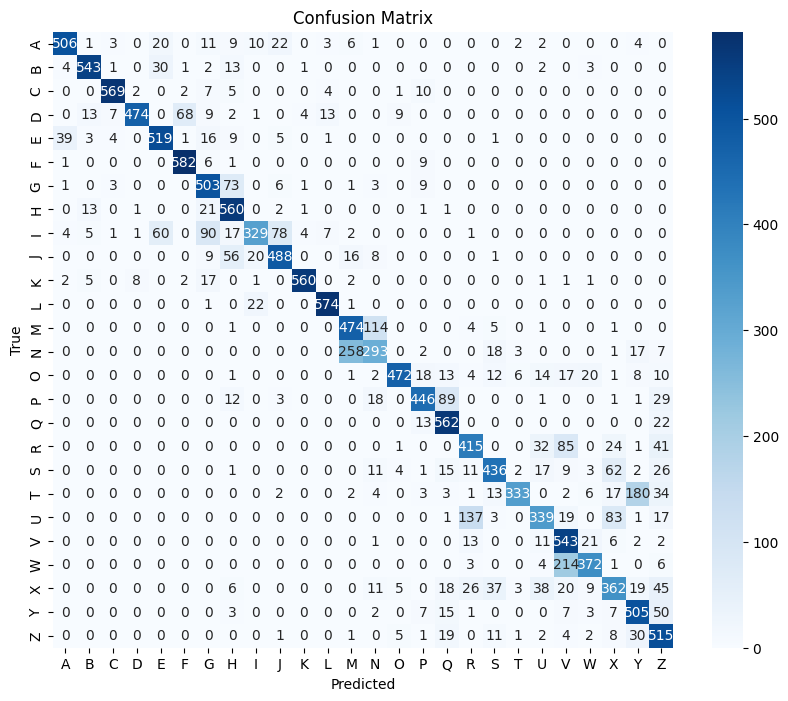

              precision    recall  f1-score   support

           A       0.91      0.84      0.87       600
           B       0.93      0.91      0.92       600
           C       0.97      0.95      0.96       600
           D       0.98      0.79      0.87       600
           E       0.83      0.87      0.85       598
           F       0.89      0.97      0.93       599
           G       0.73      0.84      0.78       600
           H       0.73      0.93      0.82       600
           I       0.86      0.55      0.67       599
           J       0.80      0.82      0.81       598
           K       0.98      0.93      0.96       600
           L       0.95      0.96      0.96       598
           M       0.62      0.79      0.70       600
           N       0.63      0.49      0.55       599
           O       0.95      0.79      0.86       599
           P       0.86      0.74      0.80       600
           Q       0.76      0.94      0.84       597
           R       0.67    

<Figure size 640x480 with 0 Axes>

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
val_steps = validation_generator.samples // BATCH_SIZE
y_true = []
y_pred = []

for _ in range(val_steps):
    x, y = next(validation_generator)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(model.predict(x), axis=1))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_classes, yticklabels=valid_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig('/content/confusion_matrix.png')  # Save for report

# Classification Report (Precision, Recall, F1)
print(classification_report(y_true, y_pred, target_names=valid_classes))

Save Accuracy Plot (from training):

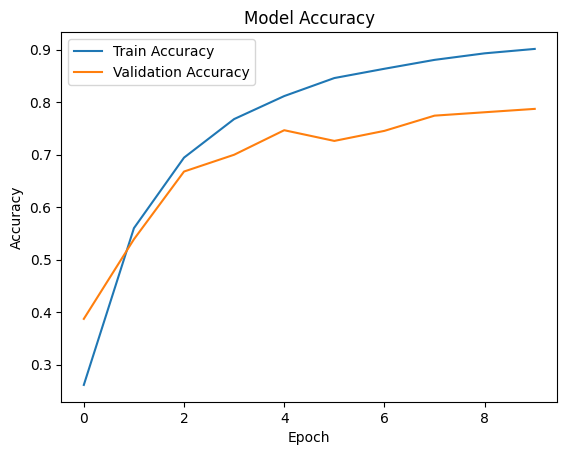

<Figure size 640x480 with 0 Axes>

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('/content/accuracy_plot.png')  # Save for report

In [24]:
files.download('/content/accuracy_plot.png')
files.download('/content/confusion_matrix.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import os
print(os.listdir('/content/asl_dataset/archive/asl_alphabet_test/asl_alphabet_test'))

['space_test.jpg', 'N_test.jpg', 'R_test.jpg', 'P_test.jpg', 'X_test.jpg', 'S_test.jpg', 'U_test.jpg', 'D_test.jpg', 'L_test.jpg', 'C_test.jpg', 'J_test.jpg', 'G_test.jpg', 'A_test.jpg', 'Y_test.jpg', 'K_test.jpg', 'V_test.jpg', 'F_test.jpg', 'nothing_test.jpg', 'B_test.jpg', 'I_test.jpg', 'O_test.jpg', 'M_test.jpg', 'T_test.jpg', 'H_test.jpg', 'Z_test.jpg', 'W_test.jpg', 'E_test.jpg', 'Q_test.jpg']


In [32]:
import os
test_dir = '/content/asl_dataset/archive/asl_alphabet_test/asl_alphabet_test'
print(os.listdir(test_dir))

['space_test.jpg', 'N_test.jpg', 'R_test.jpg', 'P_test.jpg', 'X_test.jpg', 'S_test.jpg', 'U_test.jpg', 'D_test.jpg', 'L_test.jpg', 'C_test.jpg', 'J_test.jpg', 'G_test.jpg', 'A_test.jpg', 'Y_test.jpg', 'K_test.jpg', 'V_test.jpg', 'F_test.jpg', 'nothing_test.jpg', 'B_test.jpg', 'I_test.jpg', 'O_test.jpg', 'M_test.jpg', 'T_test.jpg', 'H_test.jpg', 'Z_test.jpg', 'W_test.jpg', 'E_test.jpg', 'Q_test.jpg']


In [2]:
import os
test_dir = '/content/asl_dataset/archive/asl_alphabet_test/asl_alphabet_test'
print(os.listdir(test_dir))

['space_test.jpg', 'N_test.jpg', 'R_test.jpg', 'P_test.jpg', 'X_test.jpg', 'S_test.jpg', 'U_test.jpg', 'D_test.jpg', 'L_test.jpg', 'C_test.jpg', 'J_test.jpg', 'G_test.jpg', 'A_test.jpg', 'Y_test.jpg', 'K_test.jpg', 'V_test.jpg', 'F_test.jpg', 'nothing_test.jpg', 'B_test.jpg', 'I_test.jpg', 'O_test.jpg', 'M_test.jpg', 'T_test.jpg', 'H_test.jpg', 'Z_test.jpg', 'W_test.jpg', 'E_test.jpg', 'Q_test.jpg']


Skipping invalid label: space in space_test.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


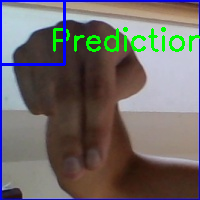

Image: N_test.jpg, True Label: N, Predicted: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


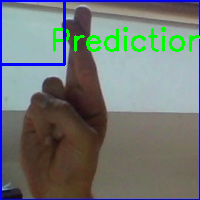

Image: R_test.jpg, True Label: R, Predicted: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


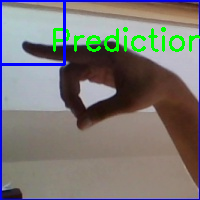

Image: P_test.jpg, True Label: P, Predicted: F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


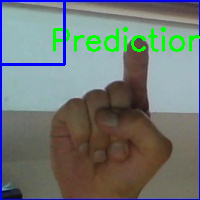

Image: X_test.jpg, True Label: X, Predicted: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


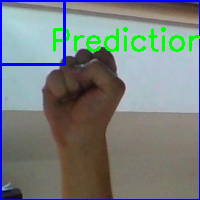

Image: S_test.jpg, True Label: S, Predicted: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


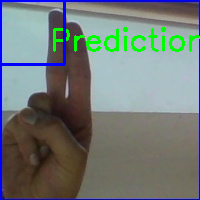

Image: U_test.jpg, True Label: U, Predicted: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


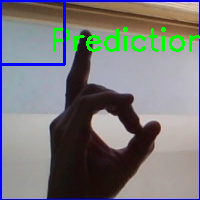

Image: D_test.jpg, True Label: D, Predicted: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


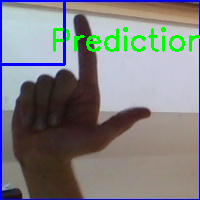

Image: L_test.jpg, True Label: L, Predicted: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


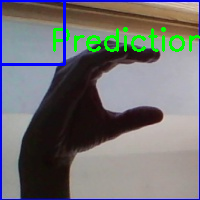

Image: C_test.jpg, True Label: C, Predicted: J
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


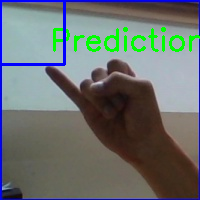

Image: J_test.jpg, True Label: J, Predicted: J
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


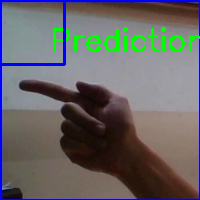

Image: G_test.jpg, True Label: G, Predicted: J
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


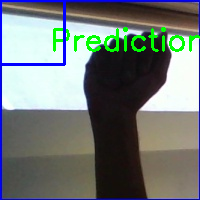

Image: A_test.jpg, True Label: A, Predicted: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


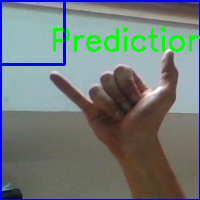

Image: Y_test.jpg, True Label: Y, Predicted: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


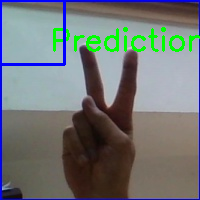

Image: K_test.jpg, True Label: K, Predicted: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


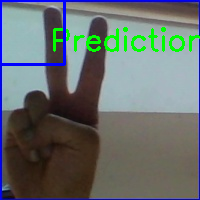

Image: V_test.jpg, True Label: V, Predicted: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


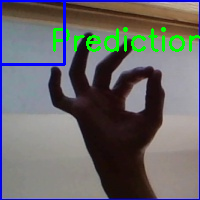

Image: F_test.jpg, True Label: F, Predicted: F
Skipping invalid label: nothing in nothing_test.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


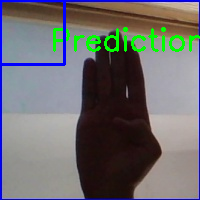

Image: B_test.jpg, True Label: B, Predicted: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


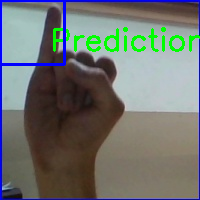

Image: I_test.jpg, True Label: I, Predicted: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


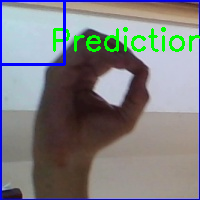

Image: O_test.jpg, True Label: O, Predicted: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


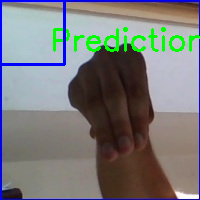

Image: M_test.jpg, True Label: M, Predicted: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


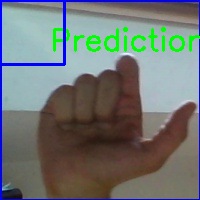

Image: T_test.jpg, True Label: T, Predicted: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


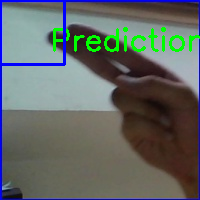

Image: H_test.jpg, True Label: H, Predicted: H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


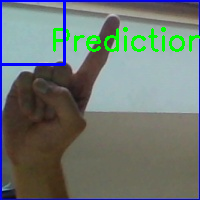

Image: Z_test.jpg, True Label: Z, Predicted: Z
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


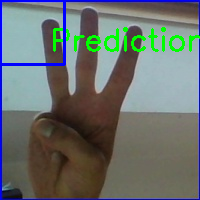

Image: W_test.jpg, True Label: W, Predicted: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


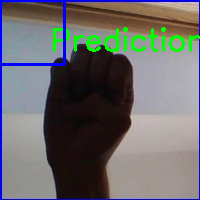

Image: E_test.jpg, True Label: E, Predicted: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


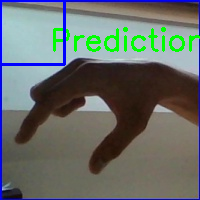

Image: Q_test.jpg, True Label: Q, Predicted: M


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Screenshot saved and downloaded successfully


In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the trained model
model = load_model('/content/asl_model.h5')
classes = {i: chr(65+i) for i in range(26)}  # A-Z mapping

# Test directory
test_dir = '/content/asl_dataset/archive/asl_alphabet_test/asl_alphabet_test'

# Get list of test images
test_images = [img for img in os.listdir(test_dir) if img.endswith(('.jpg', '.png'))]
if not test_images:
    print("No valid image files found in test directory")
    exit()

# Flag to track if a valid frame is processed
valid_frame = None

# Process each test image
for img_name in test_images:
    # Extract true label from filename (e.g., 'A' from 'A_test.jpg')
    true_label = img_name.split('_')[0]  # Assumes format 'A_test.jpg'
    if true_label not in [chr(i) for i in range(65, 91)]:  # Validate label is A-Z
        print(f"Skipping invalid label: {true_label} in {img_name}")
        continue

    img_path = os.path.join(test_dir, img_name)
    frame = cv2.imread(img_path)  # Load image

    if frame is not None:
        # Preprocess ROI (use the entire image)
        roi = frame
        roi_resized = cv2.resize(roi, (64, 64))
        roi_normalized = roi_resized / 255.0
        roi_input = np.expand_dims(roi_normalized, axis=0)

        # Predict
        pred = model.predict(roi_input)
        pred_class = classes[np.argmax(pred)]

        # Overlay prediction
        cv2.putText(frame, f'Prediction: {pred_class}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.rectangle(frame, (0, 0), (64, 64), (255, 0, 0), 2)  # Rectangle around the image

        # Display in Colab
        cv2_imshow(frame)
        print(f"Image: {img_name}, True Label: {true_label}, Predicted: {pred_class}")
        valid_frame = frame  # Store the last valid frame

        if cv2.waitKey(1000) & 0xFF == ord('q'):  # Display for 1 second
            break
    else:
        print(f"Failed to load image: {img_path}. Check file integrity or format.")

# Save a screenshot only if a valid frame exists
if valid_frame is not None:
    cv2.imwrite('/content/realtime_demo.png', valid_frame)
    from google.colab import files
    files.download('/content/realtime_demo.png')
    print("Screenshot saved and downloaded successfully")
else:
    print("No valid frames to save. Check image loading issues.")

Skipping invalid label: space in space_test.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


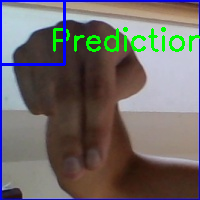

Image: N_test.jpg, True Label: N, Predicted: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


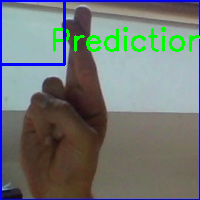

Image: R_test.jpg, True Label: R, Predicted: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


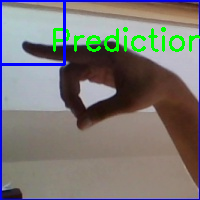

Image: P_test.jpg, True Label: P, Predicted: F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


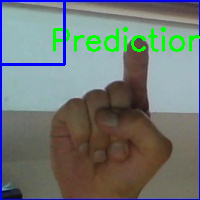

Image: X_test.jpg, True Label: X, Predicted: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


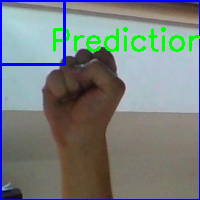

Image: S_test.jpg, True Label: S, Predicted: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


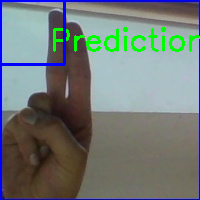

Image: U_test.jpg, True Label: U, Predicted: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


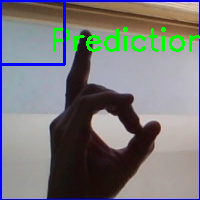

Image: D_test.jpg, True Label: D, Predicted: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


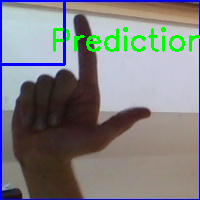

Image: L_test.jpg, True Label: L, Predicted: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


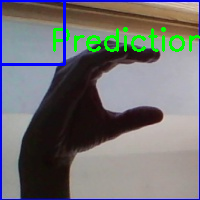

Image: C_test.jpg, True Label: C, Predicted: J
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


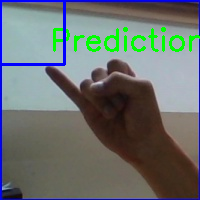

Image: J_test.jpg, True Label: J, Predicted: J
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


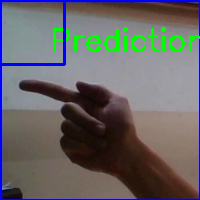

Image: G_test.jpg, True Label: G, Predicted: J
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


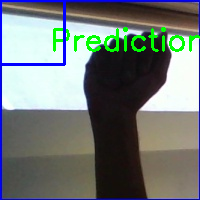

Image: A_test.jpg, True Label: A, Predicted: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


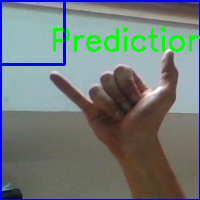

Image: Y_test.jpg, True Label: Y, Predicted: V
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


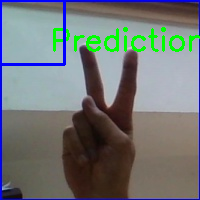

Image: K_test.jpg, True Label: K, Predicted: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


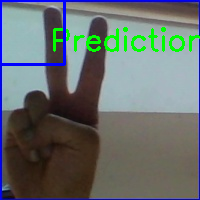

Image: V_test.jpg, True Label: V, Predicted: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


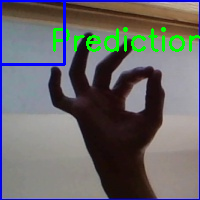

Image: F_test.jpg, True Label: F, Predicted: F
Skipping invalid label: nothing in nothing_test.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


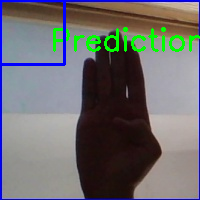

Image: B_test.jpg, True Label: B, Predicted: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


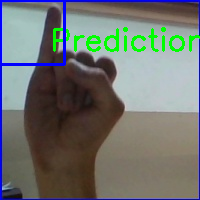

Image: I_test.jpg, True Label: I, Predicted: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


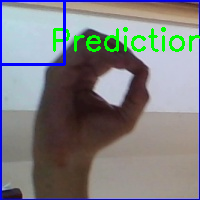

Image: O_test.jpg, True Label: O, Predicted: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


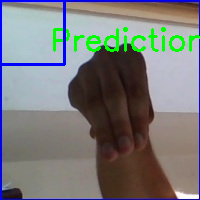

Image: M_test.jpg, True Label: M, Predicted: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


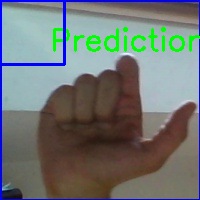

Image: T_test.jpg, True Label: T, Predicted: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


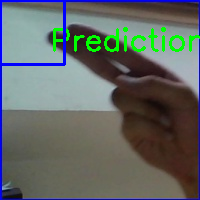

Image: H_test.jpg, True Label: H, Predicted: H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


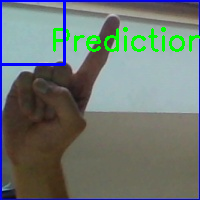

Image: Z_test.jpg, True Label: Z, Predicted: Z
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


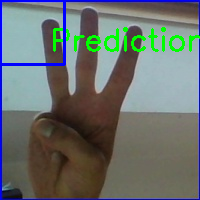

Image: W_test.jpg, True Label: W, Predicted: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


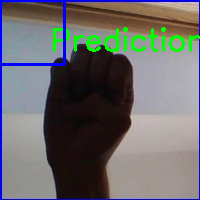

Image: E_test.jpg, True Label: E, Predicted: X
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


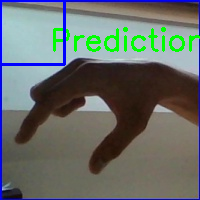

Image: Q_test.jpg, True Label: Q, Predicted: M
Real-time Detection Accuracy: 38.46% (10 out of 26 correct)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Screenshot saved and downloaded successfully


In [4]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import os

# Load the trained model
model = load_model('/content/asl_model.h5')
classes = {i: chr(65+i) for i in range(26)}  # A-Z mapping
class_indices = {chr(65+i): i for i in range(26)}  # Reverse mapping for true labels

# Test directory
test_dir = '/content/asl_dataset/archive/asl_alphabet_test/asl_alphabet_test'

# Get list of test images
test_images = [img for img in os.listdir(test_dir) if img.endswith(('.jpg', '.png'))]
if not test_images:
    print("No valid image files found in test directory")
    exit()

# Lists to store true and predicted labels
true_labels = []
pred_labels = []

# Flag to track if a valid frame is processed
valid_frame = None

# Process each test image
for img_name in test_images:
    # Extract true label from filename (e.g., 'A' from 'A_test.jpg')
    true_label = img_name.split('_')[0]  # Assumes format 'A_test.jpg'
    if true_label not in [chr(i) for i in range(65, 91)]:  # Validate label is A-Z
        print(f"Skipping invalid label: {true_label} in {img_name}")
        continue

    img_path = os.path.join(test_dir, img_name)
    frame = cv2.imread(img_path)  # Load image

    if frame is not None:
        # Preprocess ROI (use the entire image)
        roi = frame
        roi_resized = cv2.resize(roi, (64, 64))
        roi_normalized = roi_resized / 255.0
        roi_input = np.expand_dims(roi_normalized, axis=0)

        # Predict
        pred = model.predict(roi_input)
        pred_class = classes[np.argmax(pred)]
        true_index = class_indices[true_label]  # Convert true label to index

        # Store results
        true_labels.append(true_index)
        pred_labels.append(np.argmax(pred))

        # Overlay prediction
        cv2.putText(frame, f'Prediction: {pred_class}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.rectangle(frame, (0, 0), (64, 64), (255, 0, 0), 2)

        # Display in Colab
        cv2_imshow(frame)
        print(f"Image: {img_name}, True Label: {true_label}, Predicted: {pred_class}")
        valid_frame = frame  # Store the last valid frame

        if cv2.waitKey(1000) & 0xFF == ord('q'):  # Display for 1 second
            break
    else:
        print(f"Failed to load image: {img_path}. Check file integrity or format.")

# Calculate accuracy
if true_labels and pred_labels:
    accuracy = np.mean(np.array(true_labels) == np.array(pred_labels)) * 100
    correct_predictions = sum(np.array(true_labels) == np.array(pred_labels))
    total_images = len(true_labels)
    print(f"Real-time Detection Accuracy: {accuracy:.2f}% ({correct_predictions} out of {total_images} correct)")
else:
    print("No valid predictions to calculate accuracy.")

# Save a screenshot only if a valid frame exists
if valid_frame is not None:
    cv2.imwrite('/content/realtime_demo.png', valid_frame)
    from google.colab import files
    files.download('/content/realtime_demo.png')
    print("Screenshot saved and downloaded successfully")
else:
    print("No valid frames to save. Check image loading issues.")